# World Happiness Report Project
Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [143]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')

In [74]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [22]:
df.shape

(158, 12)

There are 158 rows and 12 columns in this dataset

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In this dataset there are 2 objects, 1 int64 and 9 float64 data types

By oberving above dataset, I think we need to remove three columns i.e. Country, Region and Happiness Rank because these columns does not contributing in Happiness score

In [144]:
df=df.drop('Country', axis=1)

In [145]:
df=df.drop('Region', axis=1)

In [146]:
df=df.drop('Happiness Rank', axis=1)

In [27]:
df.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [31]:
df.columns

Index(['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object')

After droping County, Region and Happiness Rank columns now I have above columns which will help me to predict Happiness Score. 

In [32]:
df.isnull().sum()

Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There is no null value in this dataset

In [41]:
#Calculating value counts
for i in df.columns:
    print(df[i].value_counts(),'\n')

5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64 

0.03780    2
0.03751    2
0.04394    2
0.05051    2
0.04934    2
          ..
0.04114    1
0.04251    1
0.03843    1
0.05371    1
0.06727    1
Name: Standard Error, Length: 153, dtype: int64 

1.39651    1
0.39753    1
1.15406    1
1.02564    1
1.12094    1
          ..
1.12254    1
1.18498    1
1.14723    1
0.59325    1
0.20868    1
Name: Economy (GDP per Capita), Length: 158, dtype: int64 

1.34951    1
0.43106    1
0.92933    1
0.80001    1
1.20215    1
          ..
1.12241    1
1.27385    1
1.25745    1
1.14184    1
0.13995    1
Name: Family, Length: 158, dtype: int64 

0.92356    2
0.94143    1
0.60268    1
0.88213    1
0.83947    1
          ..
0.66098    1
0.64368    1
0.87337    1
0.73128    1
0.28443    1
Name: Health (Life Expectancy), Length: 157, dtype: int64 

0.66557    1
0.40820    1
0.07699    1
0.339

In [48]:
df['Happiness Score'].unique()

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

In [49]:
df['Happiness Score'].nunique()

157

After checkting unique values, I can say this is regression problem.

In [43]:
df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


There are 158 rows and 9 columns in this dataset
All columns have same rows. There is not missing data in this dataset
data of Mean and 50% is looking good in all columns. Only miner diffrences 
We need to chcek data destribution by ploting the table.

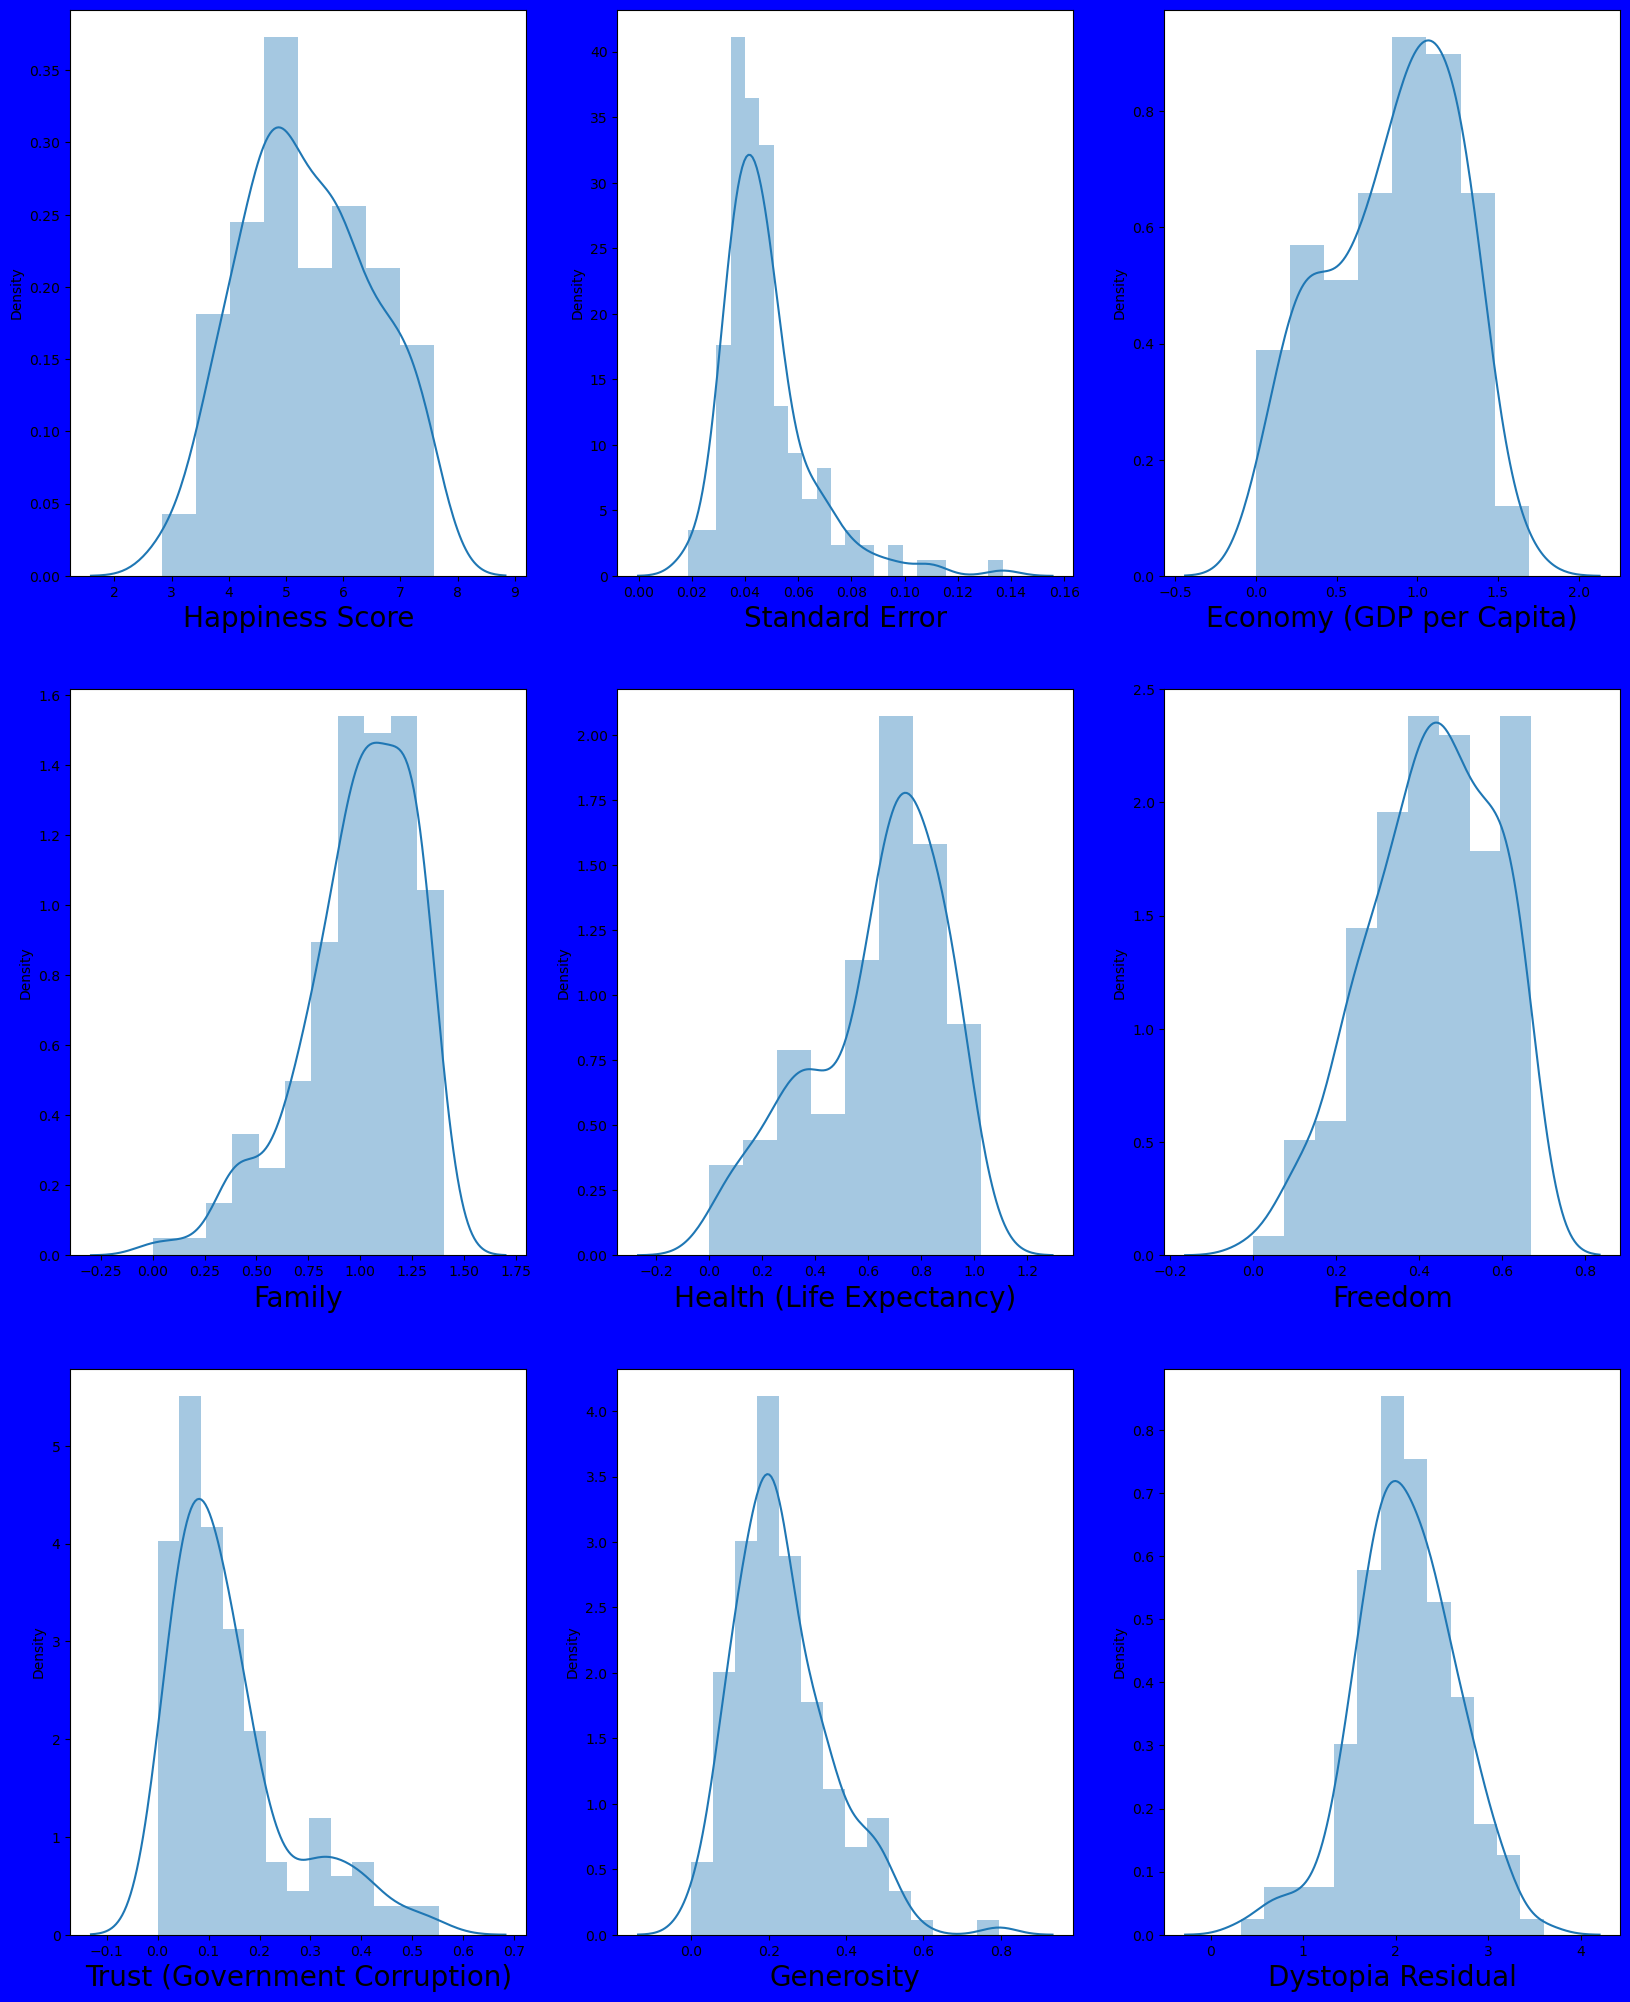

In [78]:
#Visualizing how data has been distributed in total columns
plt.figure(figsize=(20,25), facecolor='b')
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
    
plt.show()
    

I can see there are outliers in 'Standard Error' and 'Generosity' columns.

I will check again in boxplot to see if there are any outliers in these columns

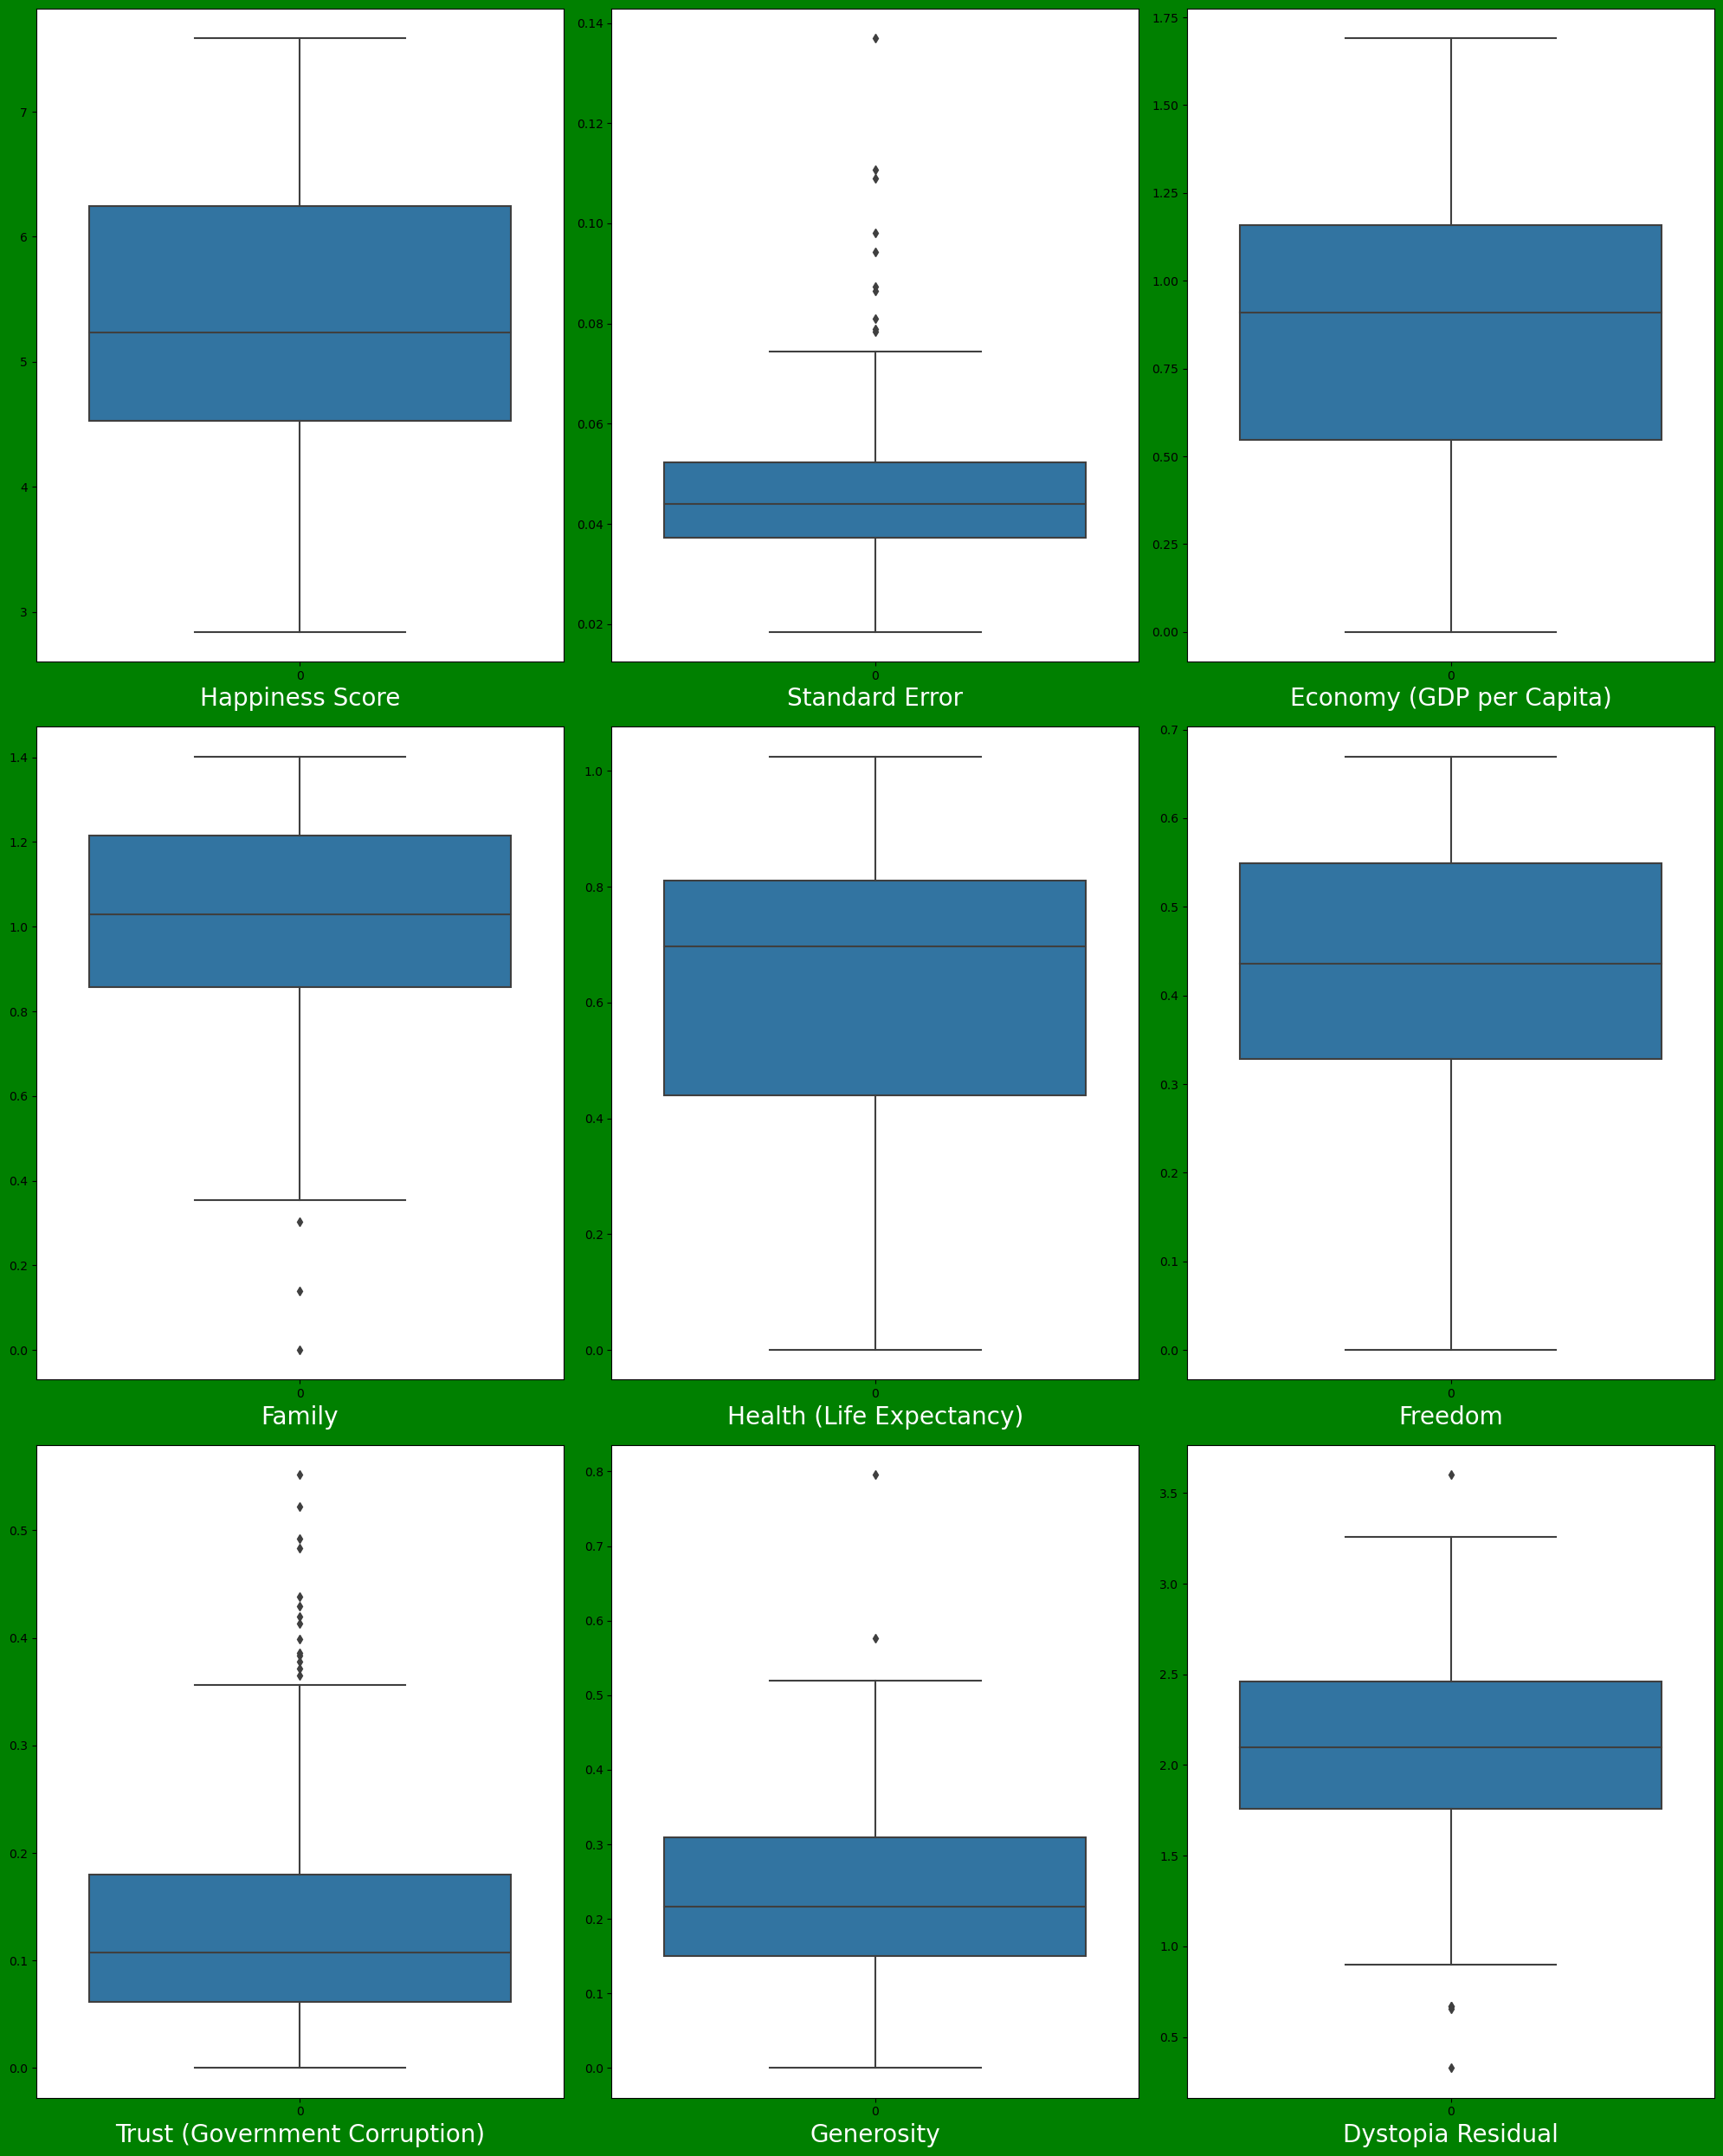

In [79]:
plt.figure(figsize=(20,25), facecolor='g')
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=20, color='w')
    plotnumber+=1
plt.tight_layout()

In abvoe boxplot I can see there are some outliers present in 'Standard Error','Trust (Government Corruption)','Family','Generosity' & 'Dystopia Residual' column which need to address first. 

In [147]:
#I will use zScore method to remove outliers from these columns
from scipy.stats import zscore

z_score=zscore(df[['Standard Error','Trust (Government Corruption)','Family','Generosity' , 'Dystopia Residual']])
abs_z_score=np.abs(z_score)

filter=(abs_z_score<2.5).all(axis=1)
df=df[filter]


In [148]:
df.shape

(140, 9)

After using zscore method to remove the outliners now I have 140 rows remains erlier I had 158 rows. I have lost 18 rows after applieng z distribution method

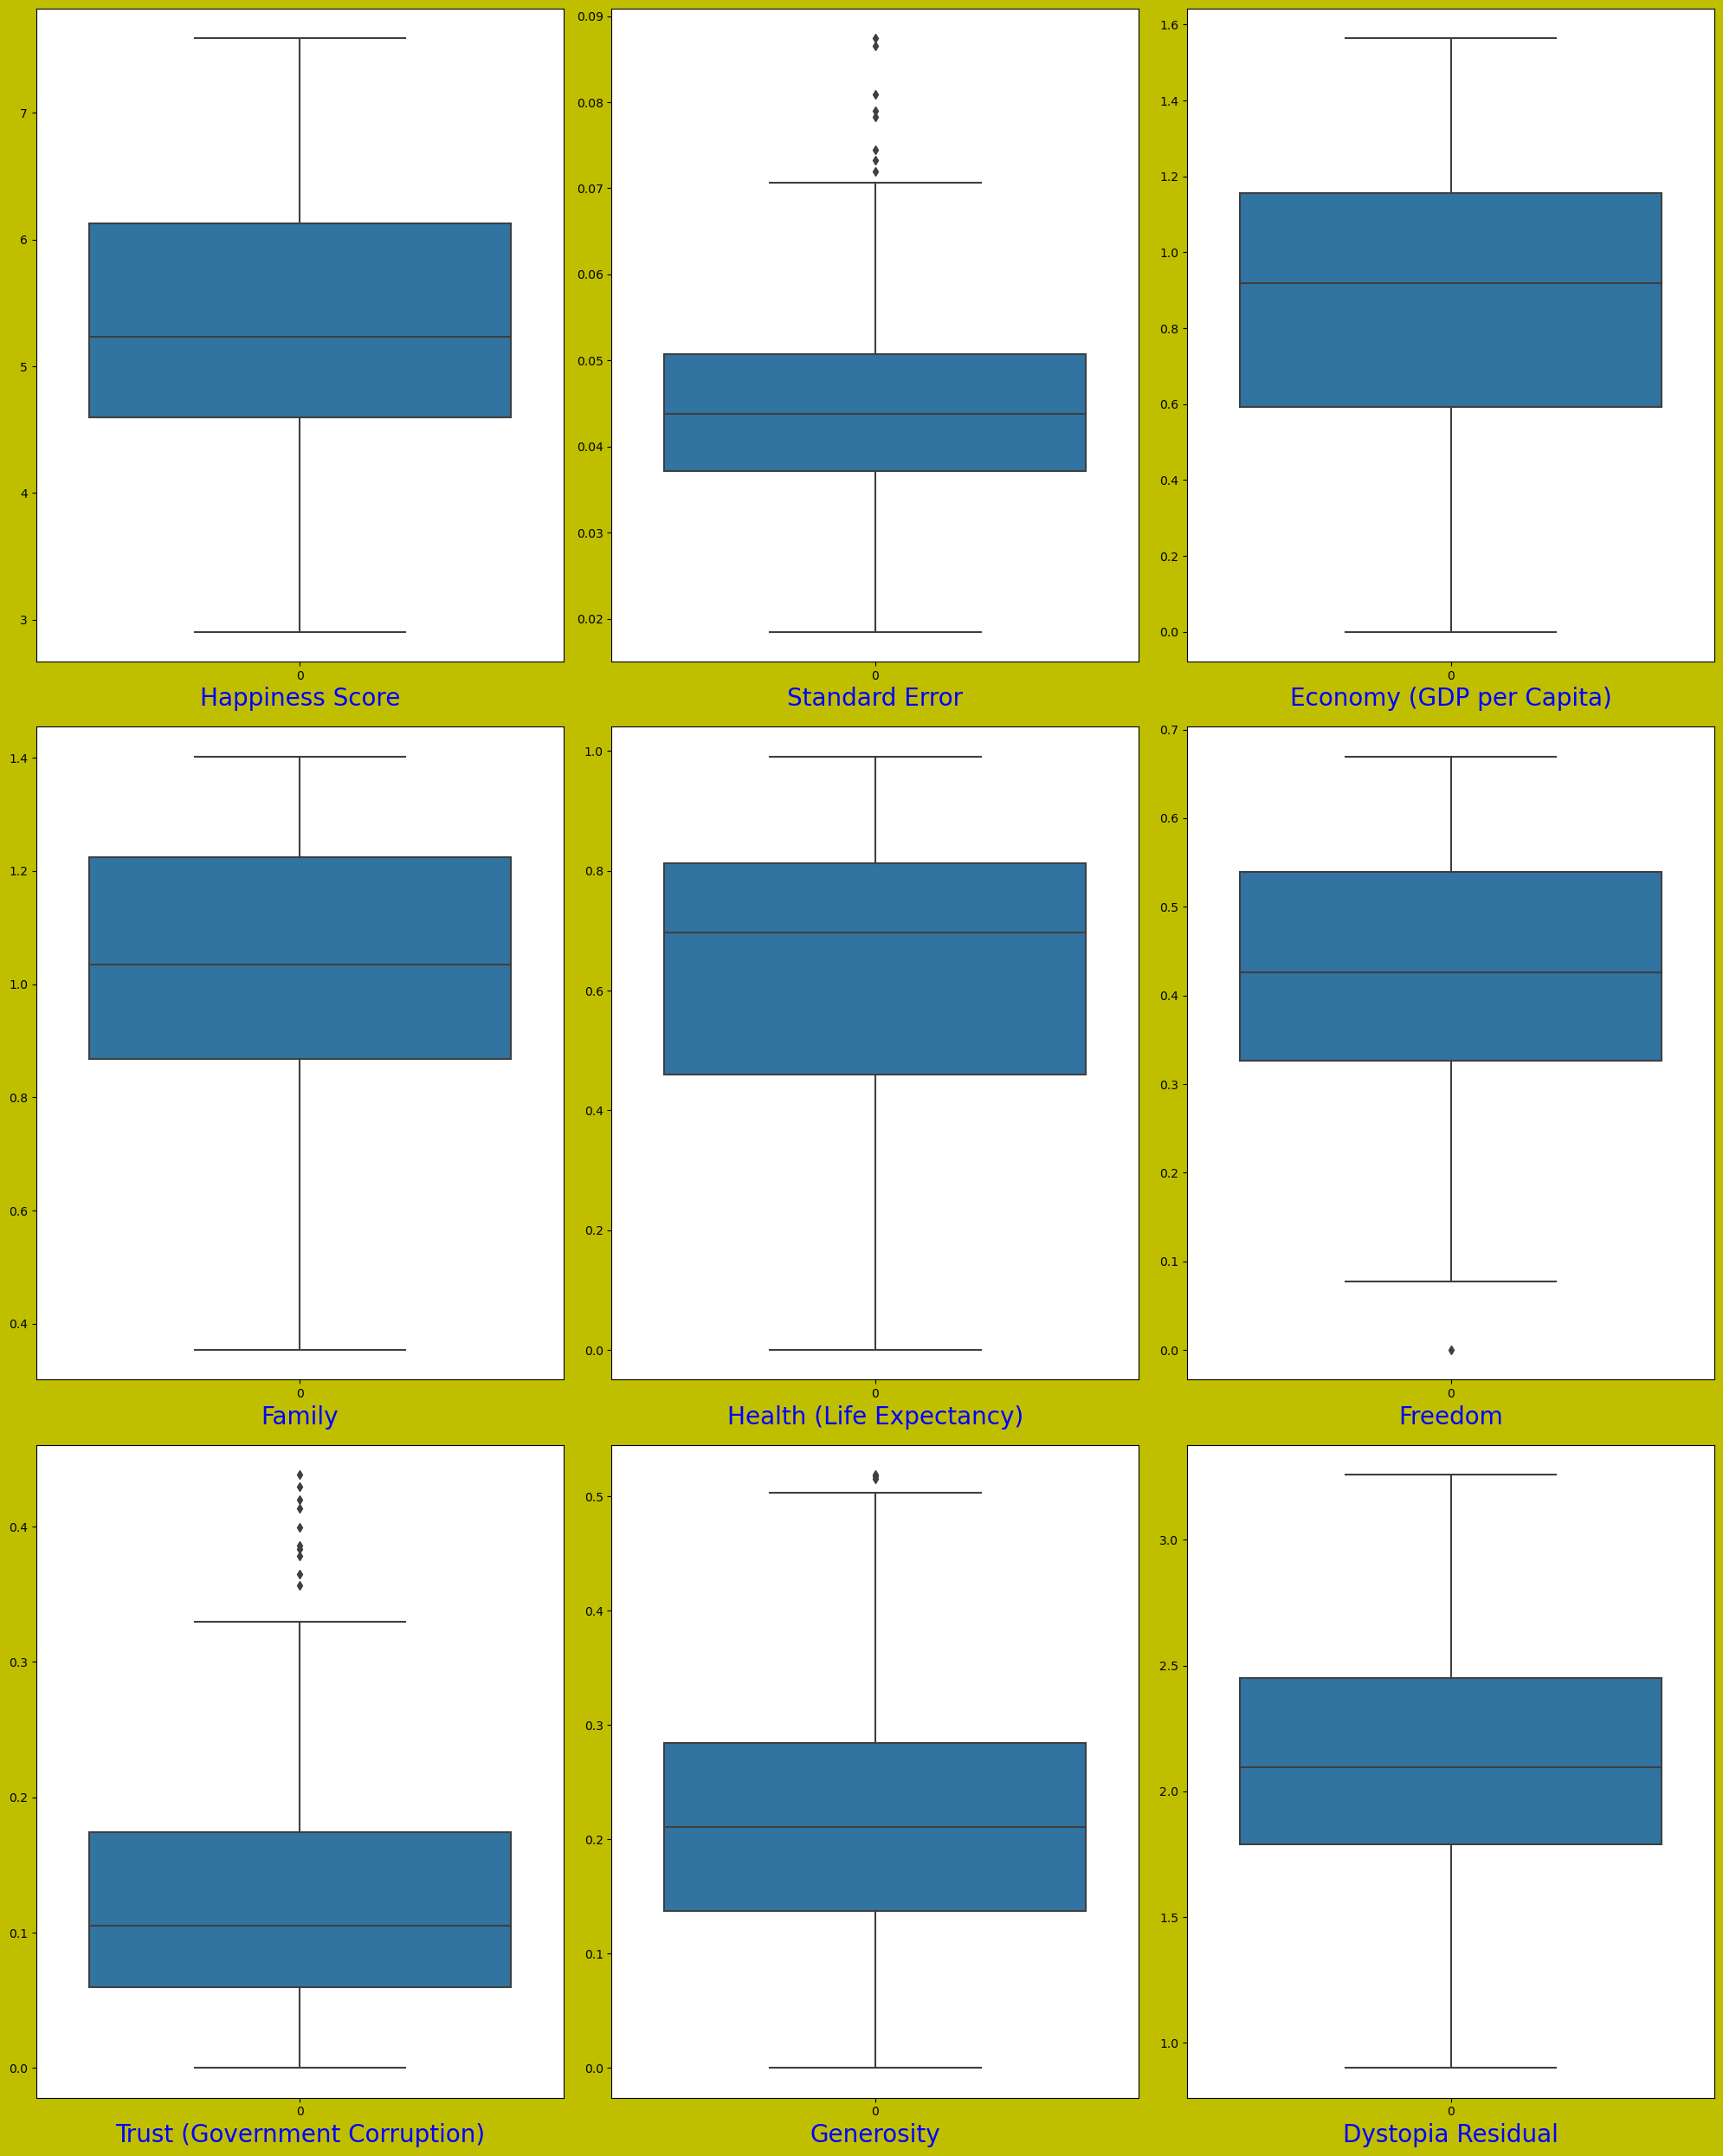

In [125]:
#Again visualising the box plot
plt.figure(figsize=(20,25), facecolor='y')
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=20, color='b')
    plotnumber+=1
plt.tight_layout()

Maximum outliers are removed but there are still some outliner present in this dataset. But already we have fewer data for model building. So, We will use this dataset as it is because we can't afford to any more data.

In [149]:
#Checking multicollinearity issue by using correlation matrix
df_corr=df.corr().abs()


<Axes: >

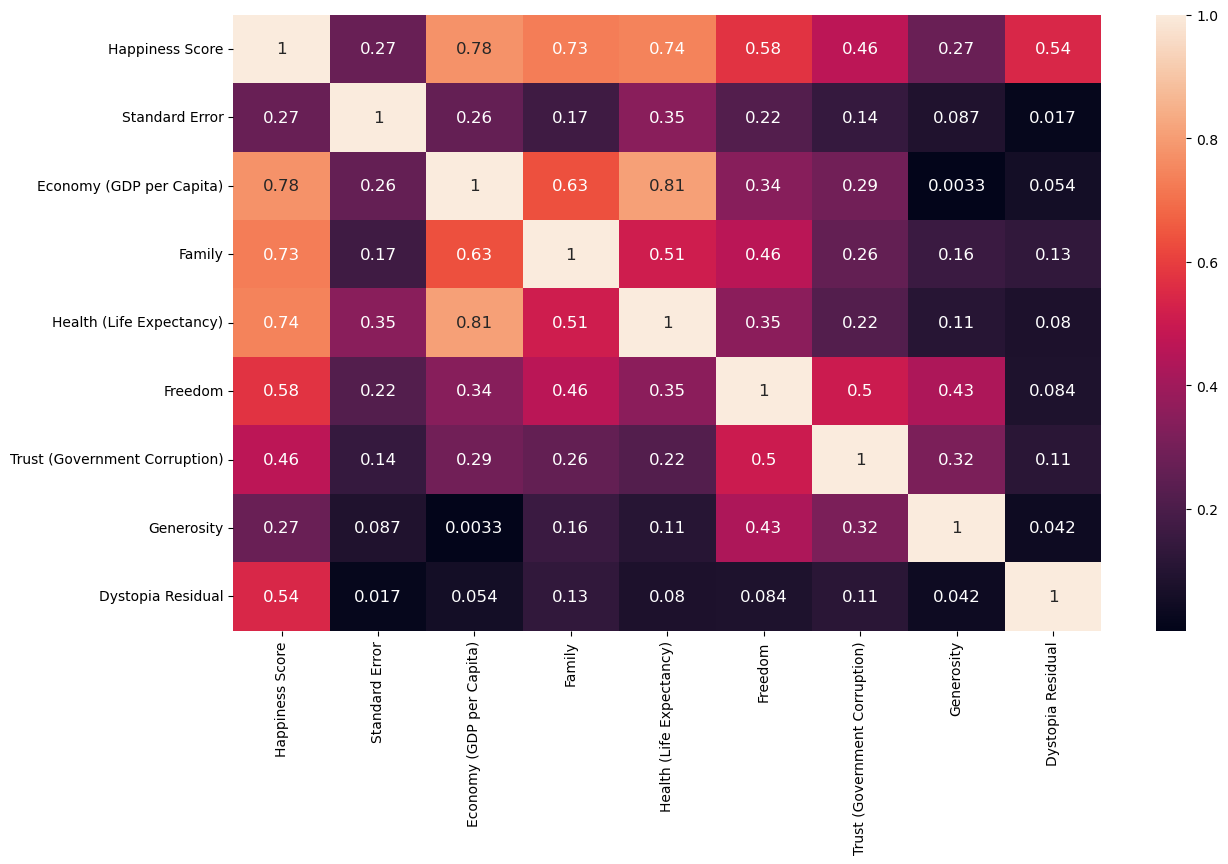

In [150]:
plt.figure(figsize=(14,8))
sns.heatmap(df_corr, annot=True, annot_kws={'size':12})

I can see there is multicollinearity between 'Economy (GDP per Capita)' and 'Health (Life Expectancy)

I will use VIF method to confirm for collinearity issue in between above columns.

In [151]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.drop('Happiness Score', axis=1)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor (x, i) for i in range(x.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,9.449942,Standard Error
1,23.415708,Economy (GDP per Capita)
2,31.099716,Family
3,24.044894,Health (Life Expectancy)
4,15.973491,Freedom
5,3.780487,Trust (Government Corruption)
6,6.339948,Generosity
7,15.833710,Dystopia Residual


Above data shows 'Health (Life Expectancy)' feature has high vif value and need to remove this column

In [152]:
df=df.drop('Health (Life Expectancy)', axis=1)

In [153]:
df.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.62877,0.14145,0.43630,2.70201
3,7.522,0.03880,1.45900,1.33095,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.63297,0.32957,0.45811,2.45176
5,7.406,0.03140,1.29025,1.31826,0.64169,0.41372,0.23351,2.61955


In [154]:
x=df.drop('Happiness Score', axis=1)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor (x, i) for i in range(x.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,9.387210,Standard Error
1,11.012068,Economy (GDP per Capita)
2,31.099711,Family
3,15.693007,Freedom
4,3.684150,Trust (Government Corruption)
5,6.096778,Generosity
6,15.000392,Dystopia Residual


<Axes: >

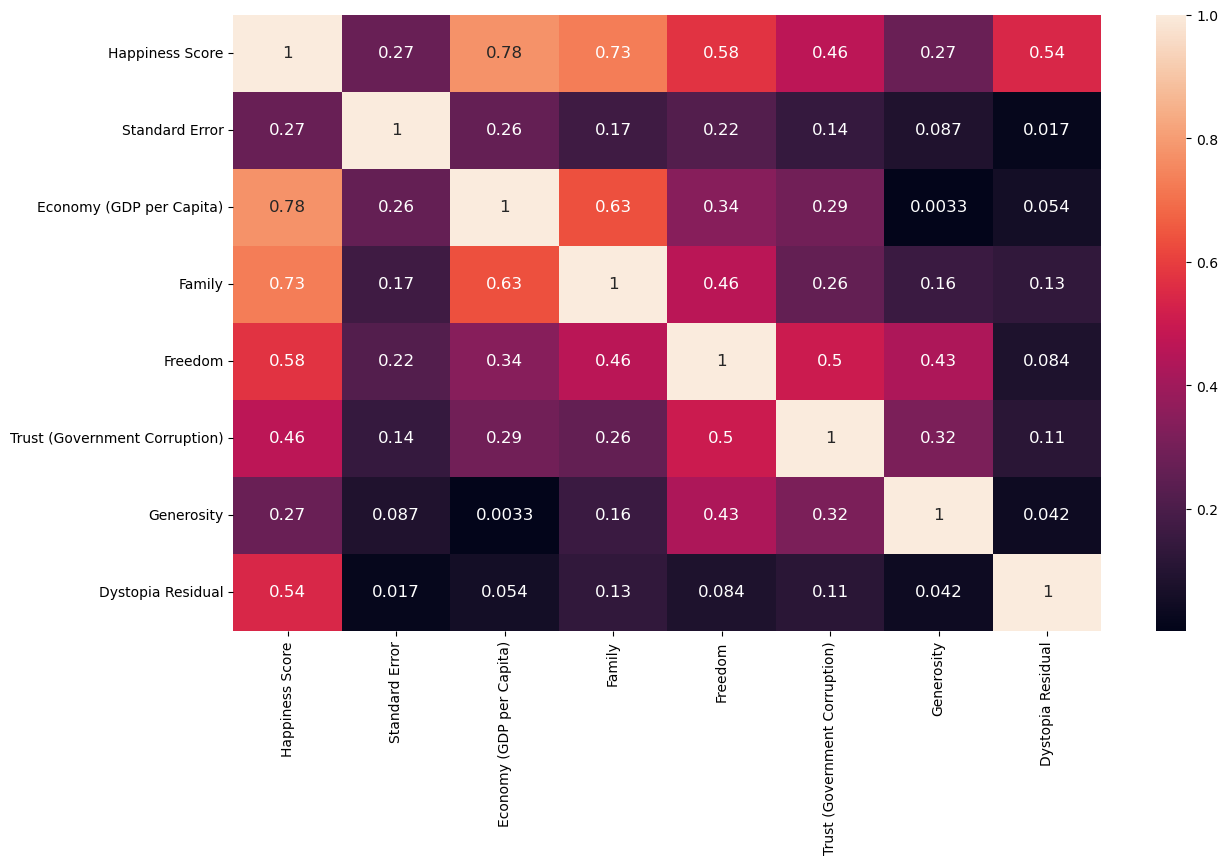

In [156]:
df_corr=df.corr().abs()
plt.figure(figsize=(14,8))
sns.heatmap(df_corr, annot=True, annot_kws={'size':12})

Now I think dataset is ready to build the model.

In [157]:
from sklearn.preprocessing import StandardScaler

In [163]:
x=df.drop('Happiness Score', axis=1)
y=df['Happiness Score']

In [166]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [174]:
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [176]:
mac=0
mrs=0

for i in range(1, 200):
    x_train, x_test, y_train, y_test=tts(x, y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>mac:
        mac=acc
        mrs=i
print("Best Accuracy score is :", mac*100, "at Random_state :", mrs)

Best Accuracy score is : 99.28615938940418 at Random_state : 176


In [177]:
x_train, x_test, y_train, y_test=tts(x, y, test_size=0.25, random_state=176)

In [178]:
def metric_score(clf,x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('\n===============================train result==============')
        print(f'R2 Score:{r2_score(y_train,y_pred)*100:2f}%')
           
    elif train==False:
        ypred=clf.predict(x_test)
        
        print('\n===============================test result==============')
        print(f'R2 Score:{r2_score(y_test,ypred)*100:2f}%')
            
        print("\nMean Absolute Error:", mean_absolute_error(y_test,ypred))
        print("\nMean Squared Error:", mean_squared_error(y_test,ypred))
        print("\nRoot Mean Squared Error:", np.sqrt(mean_squared_error(y_test,ypred)))

In [179]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
metric_score(gbr,x_train, x_test, y_train, y_test, train=True)
metric_score(gbr,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
R2 Score:99.908162%

===============================test result==============
R2 Score:93.867572%

Mean Absolute Error: 0.24853059964217722

Mean Squared Error: 0.09511120529567403

Root Mean Squared Error: 0.3084010461974376


In [180]:
lr=LinearRegression()
lr.fit(x_train,y_train)
metric_score(lr,x_train, x_test, y_train, y_test, train=True)
metric_score(lr,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
R2 Score:98.069440%

===============================test result==============
R2 Score:99.286159%

Mean Absolute Error: 0.08375946858781542

Mean Squared Error: 0.01107134740543872

Root Mean Squared Error: 0.1052204704676743


In [181]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
metric_score(rfr,x_train, x_test, y_train, y_test, train=True)
metric_score(rfr,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
R2 Score:98.255433%

===============================test result==============
R2 Score:89.990462%

Mean Absolute Error: 0.33088228571428563

Mean Squared Error: 0.15524344065714263

Root Mean Squared Error: 0.39400944234515833


In [182]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
metric_score(dtr,x_train, x_test, y_train, y_test, train=True)
metric_score(dtr,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
R2 Score:100.000000%

===============================test result==============
R2 Score:77.255893%

Mean Absolute Error: 0.4751714285714286

Mean Squared Error: 0.35275088571428564

Root Mean Squared Error: 0.5939283506571189


In [183]:
knn=KNN()
knn.fit(x_train,y_train)
metric_score(knn,x_train, x_test, y_train, y_test, train=True)
metric_score(knn,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
R2 Score:94.027895%

===============================test result==============
R2 Score:94.931886%

Mean Absolute Error: 0.23039428571428572

Mean Squared Error: 0.07860417714285711

Root Mean Squared Error: 0.28036436496612244


In [184]:
ls=Lasso()
ls.fit(x_train,y_train)
metric_score(ls,x_train, x_test, y_train, y_test, train=True)
metric_score(ls,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
R2 Score:0.000000%

===============================test result==============
R2 Score:-0.237302%

Mean Absolute Error: 1.099576598639456

Mean Squared Error: 1.5546355513832197

Root Mean Squared Error: 1.246850252188778


In [185]:
rd=Ridge()
rd.fit(x_train,y_train)
metric_score(rd,x_train, x_test, y_train, y_test, train=True)
metric_score(rd,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
R2 Score:97.279121%

===============================test result==============
R2 Score:98.995900%

Mean Absolute Error: 0.10096869762934155

Mean Squared Error: 0.015573139850931589

Root Mean Squared Error: 0.12479238699108046


In [186]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
metric_score(etr,x_train, x_test, y_train, y_test, train=True)
metric_score(etr,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
R2 Score:100.000000%

===============================test result==============
R2 Score:95.729926%

Mean Absolute Error: 0.20626771428571372

Mean Squared Error: 0.0662269351857139

Root Mean Squared Error: 0.25734594456822885


In [187]:
svr=SVR()
svr.fit(x_train,y_train)
metric_score(svr,x_train, x_test, y_train, y_test, train=True)
metric_score(svr,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
R2 Score:97.424261%

===============================test result==============
R2 Score:98.777304%

Mean Absolute Error: 0.11304465028622464

Mean Squared Error: 0.01896347126559081

Root Mean Squared Error: 0.13770792012658825


In [188]:
from sklearn.model_selection import cross_val_score

In [189]:
#LinearRegression give the highest score. So, I am cross validate this model. 
ypredlr=lr.predict(x_test)
r2lr=r2_score(y_test, ypredlr)

In [190]:
r2lr

0.9928615938940418

In [202]:
score=cross_val_score(lr, x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print('Different Between R2 score and cross validation score: ', (r2lr)-(score.mean()))

[ 0.94574079  0.71426397  0.63611089 -0.4204452   0.636175  ]
0.5023690907699953
Different Between R2 score and cross validation score:  0.4904925031240466


In [192]:
#ExtraTreesRegressor also give the highest score. So, I am cross validate this model. 
ypredetr=etr.predict(x_test)
r2etr=r2_score(y_test, ypredetr)

In [193]:
r2etr

0.9572992571548828

In [194]:
score=cross_val_score(etr, x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print('Different Between R2 score and cross validation score: ', (r2etr)-(score.mean()))

[-6.56508276 -0.89948051 -0.20581612 -3.77023274 -5.62844969]
-3.413812365887113
Different Between R2 score and cross validation score:  4.371111623041996


In [200]:
#SVR also give the highest score. So, I am cross validate this model also.
ypredsvr=svr.predict(x_test)
r2svr=r2_score(y_test, ypredsvr)
score=cross_val_score(svr, x,y, cv=5, scoring='r2')
print('SVR R2 Score is: ',r2svr)
print(score)
print(score.mean())
print('Different Between R2 score and cross validation score: ', (r2svr)-(score.mean()))

SVR R2 Score is:  0.9877730366399706
[-0.92970896  0.67423503  0.55527632 -1.1214355  -0.61000459]
-0.2863275393021173
Different Between R2 score and cross validation score:  1.274100575942088


After Scross Validating above models, I think LinearRegression give best score

In [204]:
from sklearn.model_selection import GridSearchCV

In [211]:
param={"fit_intercept": [True, False],
              "n_jobs": [-1,-5,1,5,10],
       "positive":[1,10,50,80]
             }

In [212]:
lrcv=GridSearchCV(LinearRegression(),param, cv=5)
lrcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'n_jobs': [-1, -5, 1, 5, 10],
                         'positive': [1, 10, 50, 80]})

In [213]:
lrcv.best_params_

{'fit_intercept': True, 'n_jobs': -1, 'positive': 1}

In [215]:
finalmodel=LinearRegression(fit_intercept=True, n_jobs=-1, positive=1)

In [217]:
finalmodel.fit(x_train, y_train)
pred=finalmodel.predict(x_test)

In [218]:
metric_score(finalmodel,x_train, x_test, y_train, y_test, train=True)
metric_score(finalmodel,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
R2 Score:97.969442%

===============================test result==============
R2 Score:99.257817%

Mean Absolute Error: 0.08497072585607644

Mean Squared Error: 0.011510918483800966

Root Mean Squared Error: 0.1072889485632186


In [220]:
import pickle

In [221]:
filename='World Happiness Report Project.pkl'
pickle.dump(finalmodel, open(filename, 'wb'))